## DIY Linear Regression

Let's look again at the MPG dataset. In particular, let's see how we can model
the relationship between the numeric columns and the MPG column.

## Theory

Linear regression models the relationship between one or more input variables
(**features**) and a continuous numeric output (**target**) by fitting a linear
equation.

With *simple linear regression*, there is only one feature of interest, $x$:

$$ \hat{y} = \beta_0 + \beta_1 x $$

Here, $\hat{y}$ is the target value that we want to predict, $x$ is the single
input feature, $\beta_0$ is the y-intercept, and $\beta_1$ is the coefficient
used to estimate for our model.

However, we don't have to limit ourselves to just one input variable -- we can
use *multiple linear regression* to model the output variable as a linear
combination of any number of input variables $x_1, x_2, \dots, x_n$. In that
case, our predictive model can be described as:

$$ \hat{y} = \beta_0 + \beta_1 x + \beta_2 x_2 + \dots + \beta_n x_n $$

Here, $\beta_0$ is still the y-intercept, but we have multiple coefficients
$\beta_1, \beta_2, \dots, \beta_n$ that multiple by their respective $x$
values.

## Estimating the Error

Ultimately, we want our model to have parameters that put the estimate
$\hat{y}$ as close as possible to the true $y$ values. In mathematical terms,
we want to minimize the error between the predicted and true values. 

while there are many ways to estimate error, the most common way of estimating
linear regression error is with *mean squared error (MSE)*:

$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i)^2 $$

Where $\text{MSE}$ represents the mean squared error and $m$ is the number of
observations / samples in the dataset.

We can take a couple different approaches using the equation:

1. Using *gradient descent*, making small, interative improvements that move us
   close to the most accurate parameters, or
2. Using the *closed-form solution*, which uses calculus to find the optimal
   parameters that minimize error.

I could take an entire post to talk about gradient descent, as it's one of the
most widely used optimization algorithms in machine learning. However, for
the purpose of this post, we can focus on the *closed-form solution* to find
our values.

## The Closed-Form Solution

If we combined all parameters into one vector:

$$
\bf{\beta} = \begin{bmatrix} \beta_0 & \beta_1 & \dots & \beta_n 
\end{bmatrix}^T,
$$

we can then combine all of our observations $x_1, x_2, \dots, x_n$ into a
single matrix $\bf{X}$, providing a linear equation to estimate $\bf{\hat{y}}$:

$$
\bf{\hat{y}} = \bf{X} \bf{\beta}
$$

The coefficients can be found using the following *closed-form equation*:

$$
\bf{\beta} = (\bf{X}^T \bf{X})^{-1} \bf{X}^T \bf{y}
$$

I should take a second to note: This equation provides a single clean method
of finding the optimal parameters for our linear model. While it looks like the
best solution, it really depends on the situation. Matrix algebra works
efficiently for relatively small datasets, but calculating inverses on large
matrices can often take long periods of time--that's where gradient descent
comes in. For what we're doing, however, the closed-form solution should work
well.

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df = df.dropna()

X = df[['horsepower', 'weight']].values
y = df[['mpg']].values

print('Shape of X:', X.shape)
print('First 5 rows of X:\n', X[:5])
print()
print('Shape of y:', y.shape)
print('First 5 rows of y:\n', y[:5])

Shape of X: (392, 2)
First 5 rows of X:
 [[ 130. 3504.]
 [ 165. 3693.]
 [ 150. 3436.]
 [ 150. 3433.]
 [ 140. 3449.]]

Shape of y: (392, 1)
First 5 rows of y:
 [[18.]
 [15.]
 [18.]
 [16.]
 [17.]]


In [4]:
# Modify X to include a 1's column to represent the intercept term
X_beta_0 = np.ones((X.shape[0], 1))
X_b = np.hstack([X_beta_0, X])
print('Shape of X_b:', X_b.shape)
print('First 5 rows of X_b:\n', X_b[:5])

Shape of X_b: (392, 3)
First 5 rows of X_b:
 [[1.000e+00 1.300e+02 3.504e+03]
 [1.000e+00 1.650e+02 3.693e+03]
 [1.000e+00 1.500e+02 3.436e+03]
 [1.000e+00 1.500e+02 3.433e+03]
 [1.000e+00 1.400e+02 3.449e+03]]


In [5]:
# Solve for the coefficients using the closed-form solution:
beta = np.linalg.inv(np.dot(X_b.T, X_b)).dot(X_b.T).dot(y)

print('Shape of beta:', beta.shape)
print('First 5 rows of beta:\n', beta[:5])

Shape of beta: (3, 1)
First 5 rows of beta:
 [[ 4.56402108e+01]
 [-4.73028631e-02]
 [-5.79415736e-03]]


## Interpretation

We ended with the following values for $\bf{\beta}$:

- $\beta_0 = 45.6402$
- $\beta_1 = -0.047303$
- $\beta_2 = -0.005794$

This means that the MPG can be approximated with the equation:

$$
\text{MPG} = 45.6402 - 0.047303 \cdot hp - 0.005794 \cdot w
$$

But, how accurate is our model? In other words, how strong is this
correlation, and how much error would we expect?

In [8]:
# calculate RMSE (root mean-squared-error) and R2
y_pred = X_b.dot(beta)
rmse = np.mean((y - y_pred) ** 2) ** 0.5

sse = np.sum((y - y_pred) ** 2)
tse = np.sum((y - y.mean()) ** 2)
r2 = 1 - sse / tse

print(f"RMSE:       {rmse:.2f}")
print(f"R² Score:   {r2:.2f}")

RMSE:       4.22
R² Score:   0.71


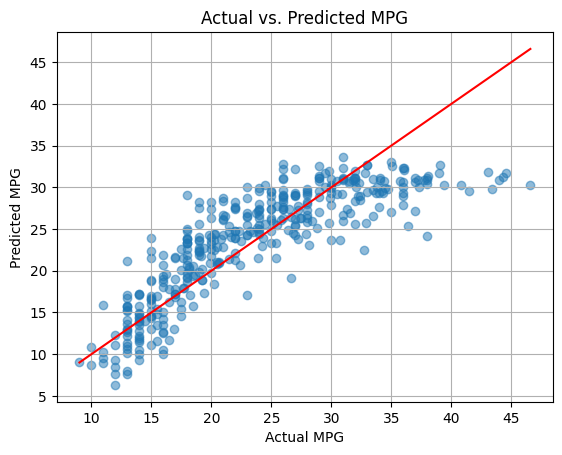

In [9]:
# Plot the 
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs. Predicted MPG")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.grid()
plt.show()

From here, we can see that our model works relatively well for low MPG, but
the model starts to deviate for higher MPG. In other words, there are some
cars that have much higher MPGs (as sown on the right, around 45 mpg), but our
model is underestimating them.

## Next Steps

Some additional things we can look at with our linear model:

- **Additional Features** - We only included horsepower and weight, but we could
  look at including cylinders, acceleration, and model year as features.
- **Categorical Encoding** - We ignored the `name` column, which contains
  data about the make/model of the car. It's possible that some manufacturers
  tend to make more efficient cars, so we could look at extracting the make
  and encoding that as a new feature.
- **Gradient Descent** - We used the closed-form solution here, but it is more
  typical to use an optimization algorithm like gradient descent, since the
  closed-form solution performs much slower on large datasets.
- **Polynomial Features** - Our model assumes that MPG has a linear
  relationship with weight & horsepower. However, it's possible there is a
  higher-order relationship at play (e.g., 2nd- or 3rd-degree). We could create
  additional higher-order features to include, perhaps improving the error of
  our existing model.